### Devoir à rendre avant le 19/05/2024 (inclus)

#### Air Passengers

#### 0 - Chargement des librairies

In [10]:
# %pip install pandas
# %pip install bokeh
# %pip install statsmodels
# %pip install bokeh
# %pip install matplotlib

In [11]:
import pandas
import statistics
import math
from scipy.stats import probplot

In [12]:
# Import de la librairie graphique Bokeh
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [13]:
output_notebook()

Loading BokehJS ...

#### 1- Chargement des données

In [14]:
# Lecture des données :
nom_fichier = "AirPassengers"
data_origine = pandas.read_csv(nom_fichier + '.csv', sep=",")

In [34]:
data_origine

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


#### 1 bis - Varriable

In [16]:
champ_date = "Month"
champ_var = "Passengers"
format_date = "Y%m%"
nombre_mois = (1960 - 1949 + 1) * 12

#### 2 - Formatage du champs date

In [17]:
data_date = data_origine.copy()
data_date[champ_date] = pandas.to_datetime(
    data_date[champ_date]
    # arg = data_date[champ_date],
    # , format = format_date
)

In [35]:
data_date.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [19]:
data_index = data_date.set_index(champ_date).sort_index()

In [36]:
data_index.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


#### 3 - Représentation graphique sous Bokeh

In [21]:
cds = ColumnDataSource(data = dict(
    date = data_index.index,
    var = data_index[champ_var]
))

p = figure(
    tools="xpan"
    , x_axis_type="datetime"
)

p.line(
    x = "date"
    , y = "var"
    , source = cds
)

show(p)

on observer ici posiblement une sesonalité avec une augmentation des ecarts

#### 4 - Statistique sommaire

##### Sélectionner les dernières décénnies et réaliser un résumé statistique: moyenne, écart-type, min, max.

In [22]:
sum(map(math.isnan, data_index[champ_var]))

0

In [25]:
data_index.shape[0] / nombre_mois

1.0

il n'y a pas de de valeur non definie ou de de manque de deonnée

In [33]:
moyenne = statistics.mean(data_index[champ_var])
ecar_types = statistics.stdev(data_index[champ_var])
minima = min(data_index[champ_var])
maxima = max(data_index[champ_var])

print("\n", "moyenne :", moyenne, "\n", "ecar-types :", ecar_types, "\n", "minima :", minima, "\n", "maxima :", maxima)


 moyenne : 280.2986111111111 
 ecar_types : 119.9663169429432 
 minima : 104 
 maxima : 622


##### 5 - Décomposition

Les données chronologiques peuvent présenter une grande variété de motifs temporels. Dans de nombreux cas, il est utile de catégoriser ces motifs et, de plus, de les diviser en composantes distinctes. En général, de nombreuses séries chronologiques peuvent être décomposées en trois parties :

<ul>
    <li><strong>Tendance :</strong> Une tendance existe lorsqu'il y a une augmentation ou une diminution à long terme des données.</li>
    <li><strong>Motif saisonnier :</strong> Un motif saisonnier existe lorsqu'une série est influencée par des facteurs saisonniers. La saisonnalité a toujours une période fixe et connue.</li>
    <li><strong>Résiduel :</strong> Le reste, après avoir pris en compte la tendance et la saisonnalité ; également appelé bruit.</li>
</ul>


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16468\2971535917.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


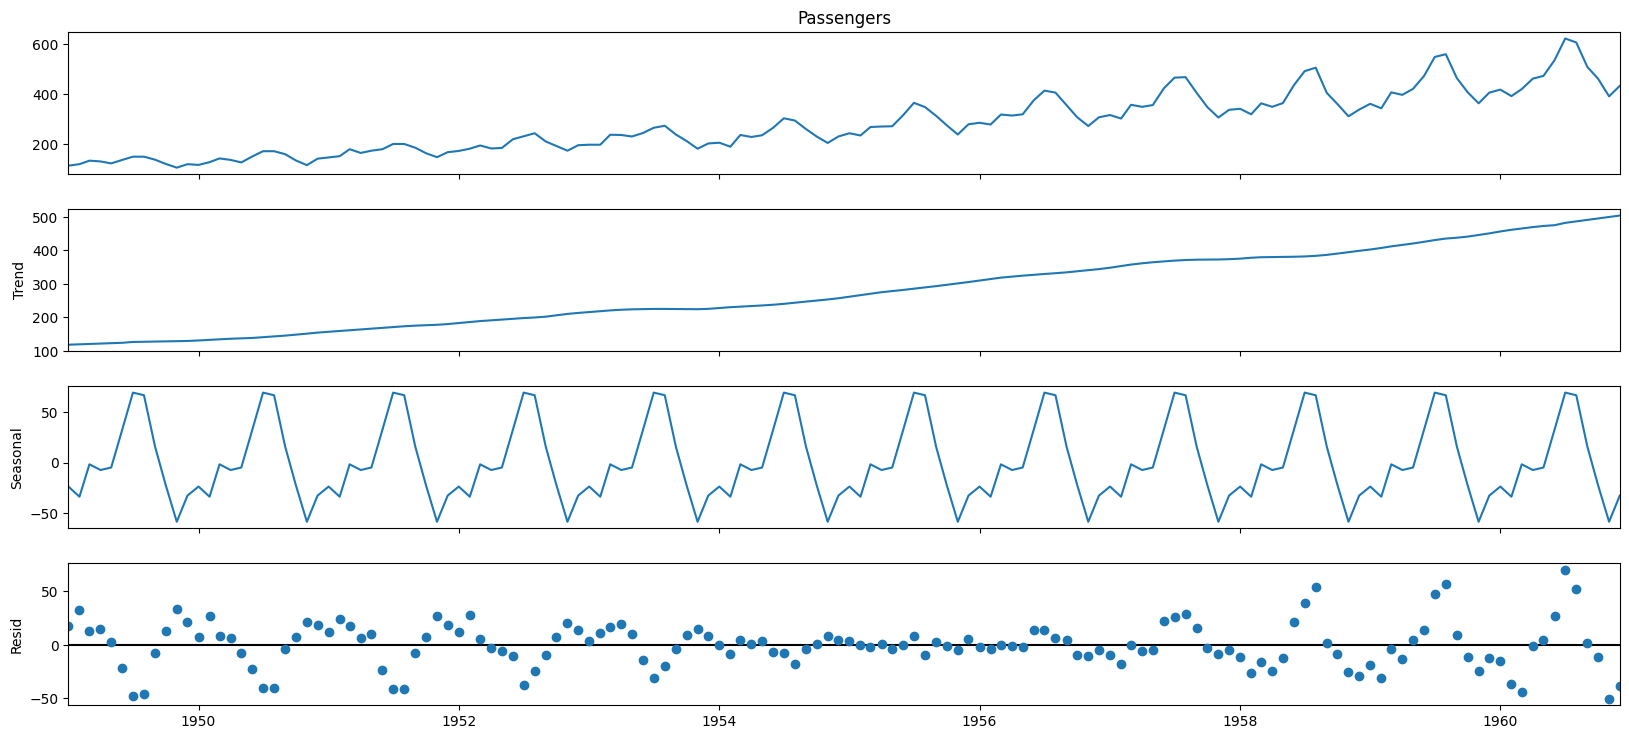

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

data_decomp = seasonal_decompose(
    data_index[champ_var]
    , model="additive"
    , extrapolate_trend="freq"
)

fig = data_decomp.plot()
fig.set_size_inches((18, 8))
fig.show()

Le graphique présente quatre panneaux.

Dans le panneau supérieur, nous voyons les données brutes, la courbe de Keeling.

Dans le graphique suivant, nous observons la composante de tendance, la composante saisonnière et le reste.

Nous constatons une tendance linéaire très forte dans l'ensemble des données.

#### 6 - Le résidu est-il gaussien (mise en évidence graphique) 

In [14]:
# Calculer les quantiles théoriques et observés
resultat = probplot(data_index, dist="norm")
quantiles_theoriques = resultat[0][0]
quantiles_observés = resultat[0][1]

# Créer le graphique Q-Q avec Bokeh
output_notebook()
p = figure(title = "Graphique Q-Q pour les données normales")
p.scatter(quantiles_theoriques, quantiles_observés)
p.line(quantiles_theoriques, quantiles_theoriques, color='red')
show(p)


Loading BokehJS ...

on peut ainsi emetre que la probabilitété suis bien une lois Normal et confirme la saisonalité